In [2]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=c18a6bd8ea3d69a2e8718e081c8e0568ce5971f531c06bc62db163a2d14365a4
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [3]:
!pip install stopwords

In [4]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 47.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6e2aea14c71c8eec907b80c6155cdb1c6368c18c503550c8093031f6f1309c75
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=f754511651b59cc99973190b470aefb7c5bff4df0531db426c847b6705c906a4
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import umap.umap_  as umap
import string
from gensim import corpora
import time
import gensim

In [6]:
ntopic = 20
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from stop_words import get_stop_words
stop_words = get_stop_words("en")

In [8]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset="train")

In [9]:
from pprint import pprint
num_topics = len(set(newsgroups_train.target_names))
pprint(list(newsgroups_train.target_names))
print("number of topics: ",num_topics)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
number of topics:  20


In [10]:
raw_sentences = []
for s in newsgroups_train.data:
  raw_sentences.append(s)

In [11]:
import re
def only_letter(tested_string):
  for letter in tested_string:
    if letter not in "abcdefghijklmnopqrstuvwxyz":
      return False
    return True

In [12]:
def clean_data(s):
  s = s.replace(">","").lower()
  if "lines" in s :
    index = s.index("lines")
    s = s[index+10:]
  word_list = word_tokenize(s)
  cleaned = []
  for w in word_list :
    if w in string.punctuation or only_letter(w):
      if w in string.punctuation or len(set(w))>1:
        cleaned.append(w)
  return " ".join(cleaned), cleaned

In [13]:
def build_data(docs):
  n_docs = len(docs)
  sentences = []
  token_lists = []
  for i in range(len(docs)):
    sentence,token_list = clean_data(docs[i])
    if token_list:
      sentences.append(sentence)
      token_lists.append(token_list)
  return sentences,token_lists

In [14]:
print("number of raw sentences",len(raw_sentences))

number of raw sentences 11314


In [15]:
print(raw_sentences[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [16]:
sentences,token_lists = build_data(raw_sentences)

In [17]:
print(len(sentences))

11300


In [18]:
print("sentence after cleaning",sentences[0])

sentence after cleaning was wondering if anyone out there could enlighten me on this car saw the other day . it was sports car , looked to be from the late early . it was called bricklin . the doors were really small . in addition , the front bumper was separate from the rest of the body . this is all know . if anyone can tellme model name , engine specs , years of production , where this car is made , history , or whatever info you have on this funky looking car , please e-mail . thanks , - il brought to you by your neighborhood lerxst


In [19]:
def get_tfidf_embedding(items):
  tf_idf = TfidfVectorizer()
  embeddings = tf_idf.fit_transform(items)
  return embeddings

In [20]:
embedding_tf_idf = get_tfidf_embedding(sentences)

In [21]:
print("shape of sentences applied tf_idf",embedding_tf_idf.shape)

shape of sentences applied tf_idf (11300, 102898)


In [22]:
print("type of tf_idf vector",type(embedding_tf_idf))

type of tf_idf vector <class 'scipy.sparse.csr.csr_matrix'>


In [23]:
print("sample of tf_idf vector",embedding_tf_idf[9])

sample of tf_idf vector   (0, 91912)	0.05159918267389864
  (0, 84585)	0.1024118843946549
  (0, 93375)	0.07651094656862864
  (0, 43088)	0.06385952372966246
  (0, 65071)	0.05014665188445714
  (0, 80828)	0.054140440385441975
  (0, 19861)	0.05611501599590524
  (0, 20168)	0.059477563221432744
  (0, 48772)	0.08317394799982607
  (0, 84544)	0.07368401361441321
  (0, 19990)	0.0703556442216805
  (0, 40187)	0.053998553188441864
  (0, 85034)	0.10690877544396998
  (0, 14839)	0.044554533333934616
  (0, 75728)	0.08317394799982607
  (0, 94875)	0.03031915163658919
  (0, 78958)	0.06341135374505782
  (0, 33331)	0.05986950146094701
  (0, 75609)	0.051867364603253065
  (0, 40902)	0.06493947117244596
  (0, 92806)	0.062264815639706574
  (0, 63780)	0.029562125010259347
  (0, 71449)	0.10847210088554912
  (0, 44462)	0.05492944483870948
  (0, 92801)	0.045046622829909046
  :	:
  (0, 82965)	0.022414328844487033
  (0, 97709)	0.04670970789661624
  (0, 7515)	0.03993541847689531
  (0, 97977)	0.08823705956587952
  (0, 3

In [77]:
def predict_topic_with_kmeans(embedding,num_topics):
  kmeans =KMeans(num_topics)
  kmeans.fit(embedding)
  topic_labels = kmeans.predict(embedding)
  return topic_labels

In [ ]:
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )
    
    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)

In [79]:
def plot_embeddings(embedding,labels,title):
  labels = np.array(labels)
  distinct_labels = set(labels)
  n = len(embedding)
  counter = Counter(labels)
  for i in range(len(distinct_labels)):
    ratio = (counter[i] / n) *100
    cluster_label = f"cluster{i}:{round(ratio,2)}"
    x = embedding[:,0][labels==i]
    y = embedding[:,1][labels==i]
    plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
  plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
  plt.title(title)


In [86]:
def reduce_umap(embedding):
  reducer = umap.UMAP()
  embedding_umap = reducer.fit_transform(embedding)
  return embedding_umap

In [81]:
def reduce_pca(embedding):
  pca =PCA(n_components=2)
  reduced = pca.fit_transform(embedding)
  print("pca explained_variance",pca.explained_variance_)
  print("pca explained variance ratio", pca.explained_variance_ratio_)
  return reduced

In [82]:
def reduce_tsne(embedding):
  tsne =TSNE(n_components=2)
  reduced = tsne.fit_transform(embedding)
  return reduced

In [83]:
# applying kmeans to raw vectors
labels_tfidf = predict_topics_with_kmeans(embedding_tf_idf,num_topics)

In [84]:
embedding_tf_idf.shape

(11300, 102898)

In [90]:
# apply kmeans to umap vectors
embedding_tf_idf_umap = reduce_umap(embedding_tf_idf)
labels_tfidf_umap = predict_topics_with_kmeans(embedding_tf_idf_umap,num_topics)

In [91]:
print("embedding shape after umap",embedding_tf_idf_umap.shape)

embedding shape after umap (11300, 2)


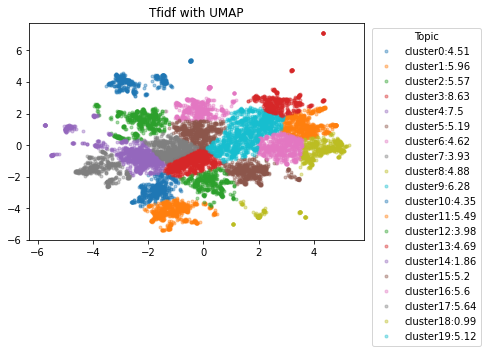

In [92]:
plot_embeddings(embedding_tf_idf_umap,labels_tfidf_umap,"Tfidf with UMAP")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


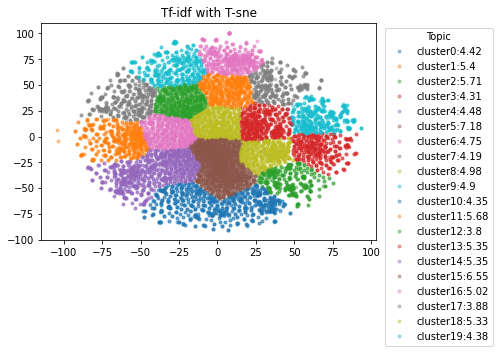

In [93]:
embedding_tf_idf_tsne =  reduce_tsne( embedding_tf_idf )
labels_tfidf_tsne  = predict_topics_with_kmeans(embedding_tf_idf_tsne,num_topics)

plot_embeddings(embedding_tf_idf_tsne,labels_tfidf_tsne,"Tf-idf with T-sne")


In [94]:
print("Silhouette score :")
print("without dim reduction",silhouette_score(embedding_tf_idf,labels_tfidf_raw))
print("with tfidf umap", silhouette_score(embedding_tf_idf_umap,labels_tfidf_umap))
print("with tfidf tsne", silhouette_score(embedding_tf_idf_tsne,labels_tfidf_tsne))

Silhouette score :
without dim reduction -0.00915870296252787
with tfidf umap 0.40412968
with tfidf tsne 0.34342837


In [ ]:
def get_document_topic_lda(model, corpus, k):
   n_doc = len(corpus)
   #init a vector of size number of docs x clusters
   document_topic_mapping = np.zeros((n_doc, k))
   for i in range(n_doc):
     # for each document create a vector of probability document belonging to topic
     for topic, prob in model.get_document_topics(corpus[i]):
       document_topic_mapping[i, topic] = prob

   return document_topic_mapping


In [131]:
def get_document_topic_lda(model,corpus,k):
  n_doc = len(corpus)
  document_topic_mapping = np.zeros((n_doc,k))
  for i in range(n_doc):
    for topic,prob in model.get_document_topics(corpus[i]):
      document_topic_mapping[i,topic] = prob
  return document_topic_mapping

In [126]:
print("number of words in the token list",len(token_lists))
dictionary = corpora.Dictionary(token_lists)
corpus = [dictionary.doc2bow(text) for text in token_lists]
k = ntopic
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=k,passes=20,id2word=dictionary)


number of words in the token list 11300


In [132]:
embedding_lda = get_document_topic_lda(ldamodel,corpus,k)
print("lda vector shape",embedding_lda.shape)
for i, topic in enumerate(embedding_lda[10].flatten()):
  print("topic" ,i+1,embedding_lda[10].flatten()[i])

lda vector shape (11300, 20)
topic 1 0.0
topic 2 0.0
topic 3 0.0
topic 4 0.1548360139131546
topic 5 0.0
topic 6 0.0
topic 7 0.0
topic 8 0.0
topic 9 0.8373379111289978
topic 10 0.0
topic 11 0.0
topic 12 0.0
topic 13 0.0
topic 14 0.0
topic 15 0.0
topic 16 0.0
topic 17 0.0
topic 18 0.0
topic 19 0.0
topic 20 0.0


In [144]:
print("number of tokens",len(token_lists))
print("sample item from corpus length",len(corpus[100]))


number of tokens 11300
sample item from corpus length 70


In [148]:
dictionary.id2token[10]

'bumper'

In [153]:
list(token_lists[100]).count(dictionary.id2token[0])

3

In [162]:
strd = sorted(ldamodel.get_document_topics(corpus[5]),key = lambda x :x[1],reverse = True)
print(strd)

[(10, 0.70515853), (8, 0.14004393), (13, 0.10901984), (14, 0.030182932), (17, 0.011436679)]


In [168]:
strd[0][1]

0.70515853

In [170]:
labels_lda =[]
for line in corpus:
  line_labels = sorted(ldamodel.get_document_topics(line),key = lambda x:x[1],reverse=True)
  top_topic = line_labels[0][0]
  labels_lda.append(top_topic)

In [172]:
np.array(labels_lda ).shape


(11300,)

In [174]:
embedding_umap_lda = reduce_umap( embedding_lda)

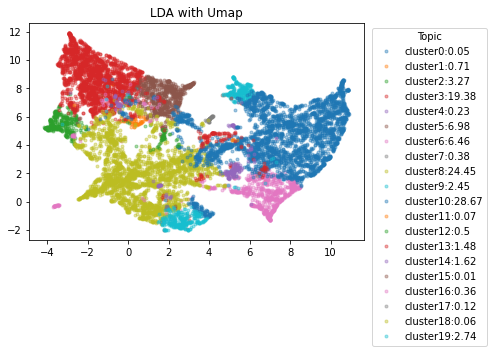

In [175]:
plot_embeddings(embedding_umap_lda, labels_lda,"LDA with Umap")

pca explained_variance [0.09181542 0.06487035]
pca explained variance ratio [0.34073649 0.24074056]


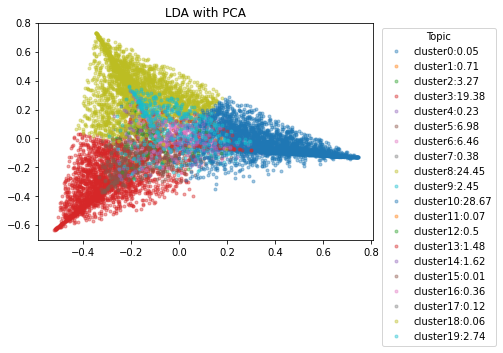

In [176]:
embedding_pca_lda = reduce_pca(embedding_lda  )
plot_embeddings(embedding_pca_lda, labels_lda,"LDA with PCA")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


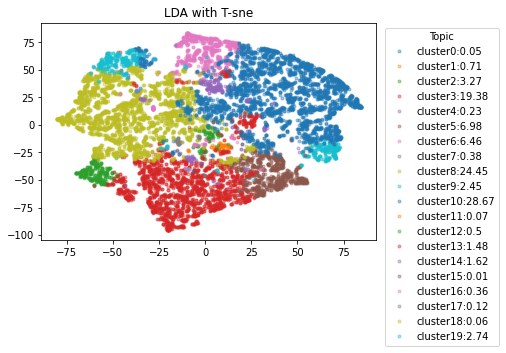

In [177]:
embedding_tsne_lda = reduce_tsne(embedding_lda  )
plot_embeddings(embedding_tsne_lda, labels_lda,"LDA with T-sne")

In [178]:
print("Silhouette score:" )
print("LDA          : ", silhouette_score(embedding_lda, labels_lda) )

print("LDA with PCA : ", silhouette_score(embedding_pca_lda, labels_lda) )

print("LDA with TSNE : ", silhouette_score(embedding_tsne_lda, labels_lda) )

print("LDA with UMAP : ", silhouette_score(embedding_umap_lda, labels_lda) )

Silhouette score:
LDA          :  0.31175882862525495
LDA with PCA :  0.05312438478632953
LDA with TSNE :  0.01382132
LDA with UMAP :  0.053460088


In [182]:
# !pip install sentence_transformers

In [181]:
from sentence_transformers import SentenceTransformer
model_bert = SentenceTransformer('bert-base-nli-max-tokens')


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/397 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [185]:
embedding_bert = np.array(model_bert.encode(sentences))

In [186]:
#Bert embeddings are shape of 768
print("Bert Embedding shape", embedding_bert.shape)
print("Bert Embedding sample", embedding_bert[0][0:50])

Bert Embedding shape (11300, 768)
Bert Embedding sample [ 0.60147244  1.6366912   1.6721617   0.25891638  1.3405272   0.3112949
  1.0919647   0.7107977   0.8977509   0.22695407  1.5706625   0.9546064
  1.4350467   0.55952775  0.28562632  0.6651941   1.8115396   1.171749
  1.094534    1.3419441   0.25644255  0.40548953  0.86336476  0.23358732
  1.7565043   1.72422     0.80487293  1.0933906  -0.04498847  0.00761055
  0.3319289   1.6406566   0.62270564  1.0356486   1.4052733   0.4956447
  0.58945847  0.0464563   0.41957027  1.3243791   0.2672838   0.48301682
  0.62336516  1.1036422   0.06445776  0.80825275  1.000084    1.7784046
  0.41128868  1.6466264 ]


In [187]:
#Apply Kmeans without dimension reduction
labels_bert_raw  = predict_topics_with_kmeans(embedding_bert,num_topics)
 

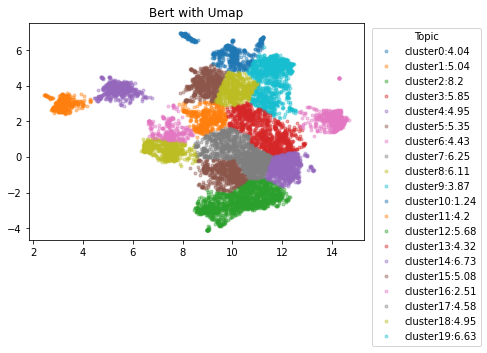

In [188]:
#Apply Kmeans for Bert Vectors  with Umap  dimension reduction

embedding_umap_bert = reduce_umap( embedding_bert )
labels_bert_umap  = predict_topics_with_kmeans(embedding_umap_bert,num_topics)
plot_embeddings(embedding_umap_bert, labels_bert_umap,"Bert with Umap")


pca explained_variance [9.088013 6.366456]
pca explained variance ratio [0.0881528  0.06175397]


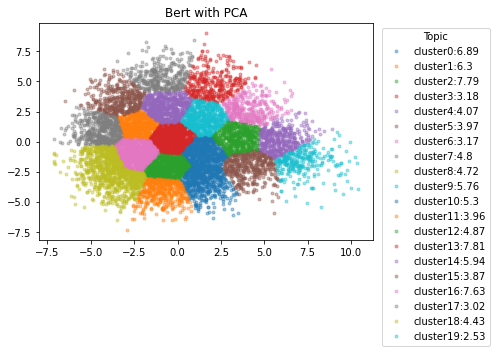

In [189]:
#Apply Kmeans for Bert Vectors  with PCA  dimension reduction

embedding_bert_pca =  reduce_pca( embedding_bert )
labels_bert_pca  = predict_topics_with_kmeans(embedding_bert_pca,num_topics)

plot_embeddings(embedding_bert_pca,labels_bert_pca,"Bert with PCA")


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


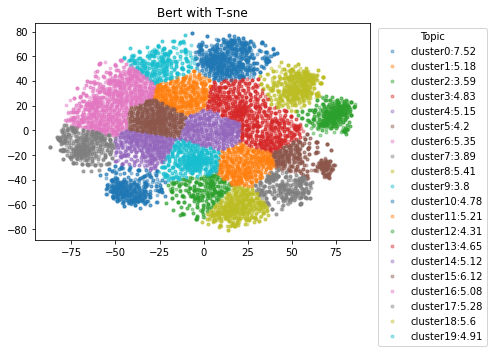

In [190]:
#Apply Kmeans for Bert Vectors  with T-sne  dimension reduction


embedding_bert_tsne =  reduce_tsne( embedding_bert )
labels_bert_tsne  = predict_topics_with_kmeans(embedding_bert_tsne,num_topics)
plot_embeddings(embedding_bert_tsne,labels_bert_tsne,"Bert with T-sne")


In [191]:
print("Silhouette score:" )

print("Raw Bert" ,silhouette_score(embedding_bert, labels_bert_raw) )

print("Bert with PCA" ,  silhouette_score(embedding_bert_pca, labels_bert_pca) )

print("Bert with Tsne" , silhouette_score(embedding_bert_tsne, labels_bert_tsne) )


print("Bert with Umap" ,  silhouette_score(embedding_umap_bert , labels_bert_umap ) )

Silhouette score:
Raw Bert 0.037532374
Bert with PCA 0.32013705
Bert with Tsne 0.38308862
Bert with Umap 0.44577733
